In [1]:
import pandas                      as pd
import matplotlib.pyplot           as plt
import seaborn                     as sns
from sklearn.model_selection       import GridSearchCV
from sklearn.preprocessing         import StandardScaler
from sklearn.preprocessing         import LabelEncoder
from sklearn.feature_selection     import RFE
from sklearn.model_selection       import cross_val_score, KFold
from sklearn.model_selection       import train_test_split
from sklearn.ensemble              import RandomForestClassifier
from sklearn.metrics               import accuracy_score, classification_report, plot_confusion_matrix

# 1. LENDO OS DADOS

In [2]:
df = pd.read_csv('dados_func.csv')
df.sample(5)

,nivel_satisfacao,ultima_avaliacao,numero_projetos,horas_medias_por_mes,tempo_empresa,acidente_trabalho,deixou_empresa,ultima_promocao_5anos,area,salario
6626,0.40,0.41,4,127,3,0,0,0,IT,low
14,0.36,0.56,2,137,3,0,1,0,sales,low
5177,0.88,0.73,5,267,3,0,0,0,IT,low
9037,0.31,0.72,2,191,3,0,0,0,hr,medium
553,0.79,1.00,5,257,6,0,1,0,sales,low


# 2. ANÁLISE BÁSICA

In [3]:
df.describe()

,nivel_satisfacao,ultima_avaliacao,numero_projetos,horas_medias_por_mes,tempo_empresa,acidente_trabalho,deixou_empresa,ultima_promocao_5anos
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


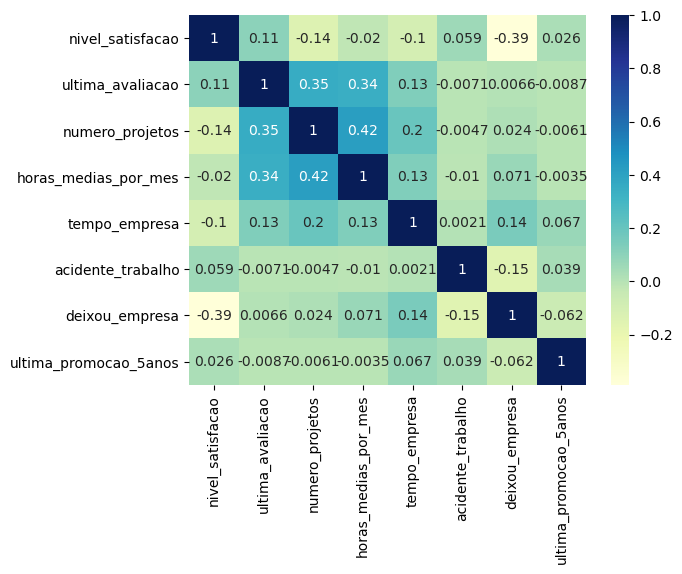

In [4]:
aux = df.corr()
sns.heatmap(aux, annot=True, cmap="YlGnBu")
plt.show()

<Figure size 800x1000 with 0 Axes>

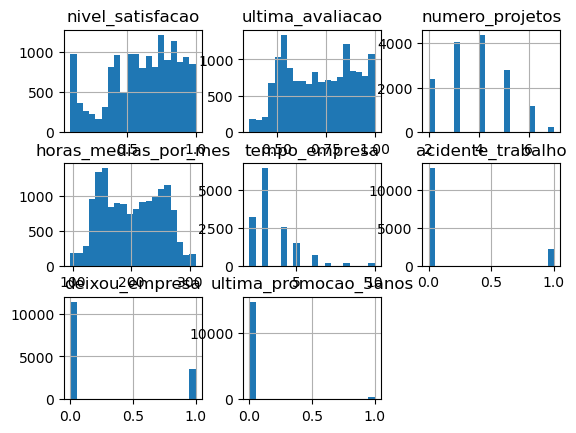

In [5]:
plt.figure(figsize=(8, 10))
df.hist(bins=20)
plt.show()

In [6]:
df.isnull().sum()

nivel_satisfacao         0
ultima_avaliacao         0
numero_projetos          0
horas_medias_por_mes     0
tempo_empresa            0
acidente_trabalho        0
deixou_empresa           0
ultima_promocao_5anos    0
area                     0
salario                  0
dtype: int64

# 3. ANÁLISE GRÁFICA

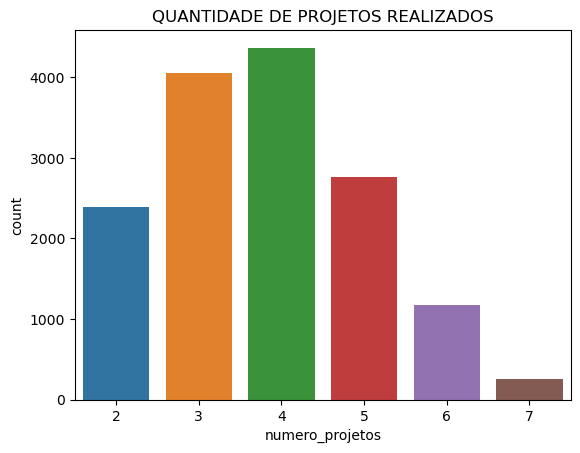

In [7]:
sns.countplot(x='numero_projetos', data=df)
plt.title('QUANTIDADE DE PROJETOS REALIZADOS')
plt.show()

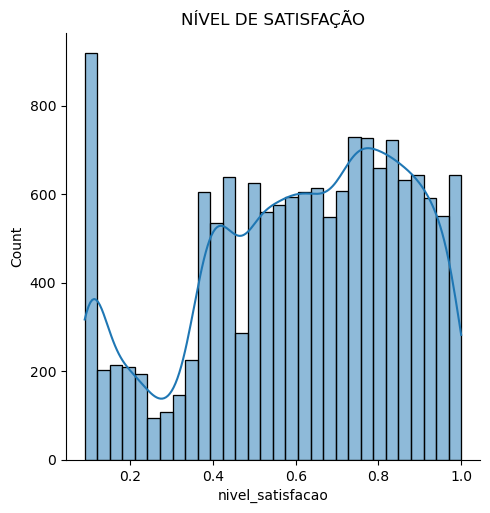

In [8]:
sns.displot(data=df, x='nivel_satisfacao', kind='hist', kde=True)
plt.title('NÍVEL DE SATISFAÇÃO')
plt.show()

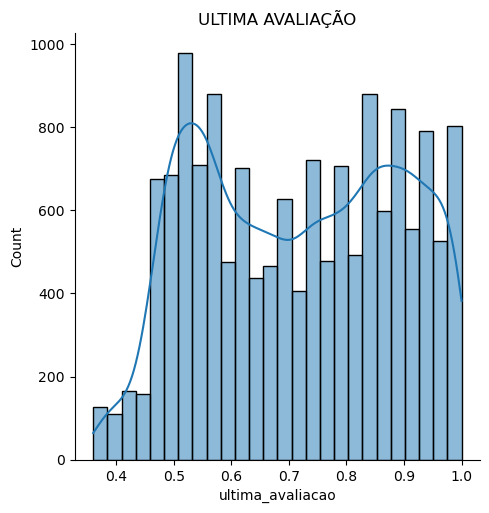

In [9]:
sns.displot(data=df, x='ultima_avaliacao', kind='hist', kde=True)
plt.title('ULTIMA AVALIAÇÃO')
plt.show()

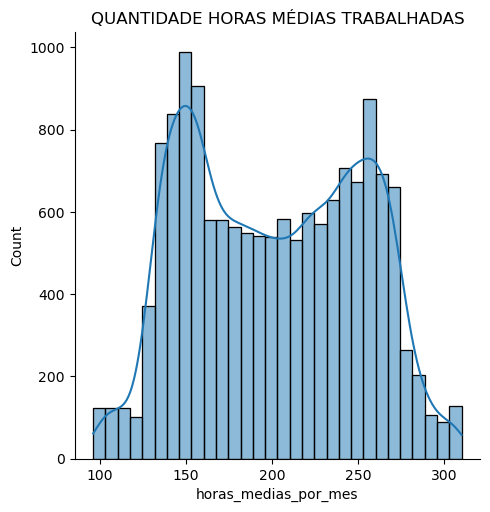

In [10]:
sns.displot(data=df, x='horas_medias_por_mes', kind='hist', kde=True)
plt.title('QUANTIDADE HORAS MÉDIAS TRABALHADAS')
plt.show()

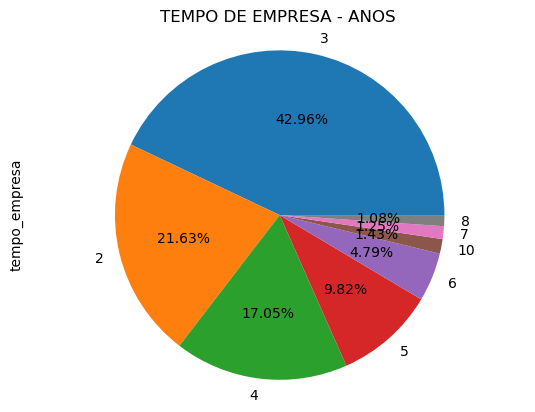

In [11]:
df.tempo_empresa.value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')
plt.title('TEMPO DE EMPRESA - ANOS')
plt.show()

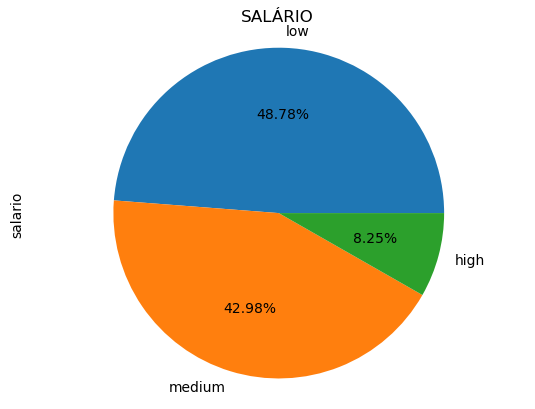

In [12]:
df.salario.value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal')
plt.title('SALÁRIO')
plt.show()

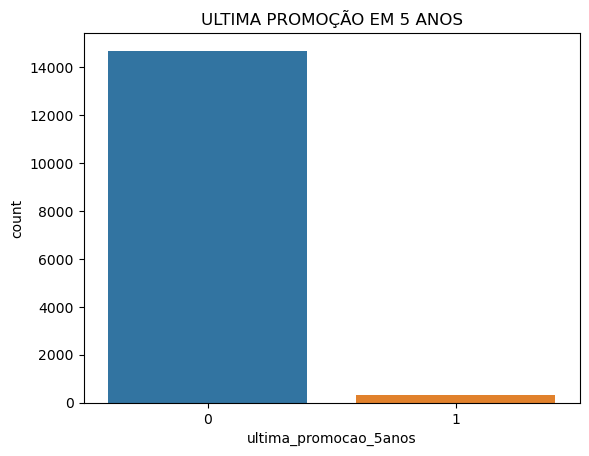

In [13]:
sns.countplot(x='ultima_promocao_5anos', data=df)
plt.title('ULTIMA PROMOÇÃO EM 5 ANOS')
plt.show()

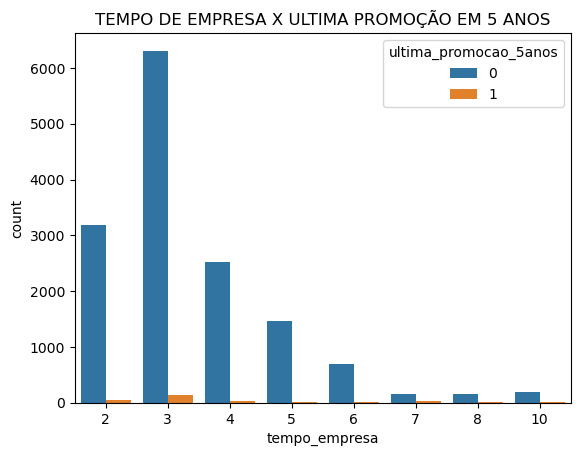

In [14]:
sns.countplot(hue='ultima_promocao_5anos', x='tempo_empresa',data=df)
plt.title('TEMPO DE EMPRESA X ULTIMA PROMOÇÃO EM 5 ANOS')
plt.show()

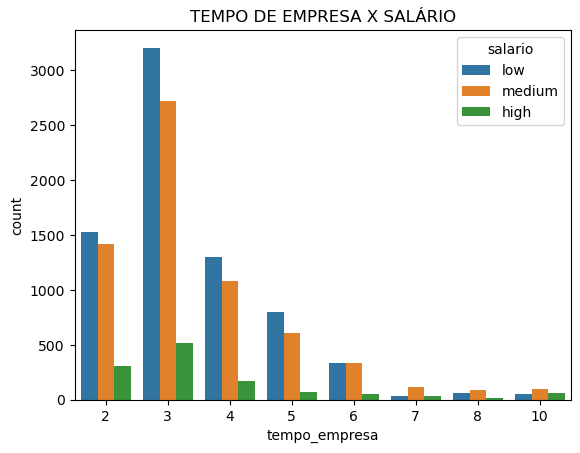

In [15]:
sns.countplot(hue='salario', x='tempo_empresa',data=df)
plt.title('TEMPO DE EMPRESA X SALÁRIO')
plt.show()

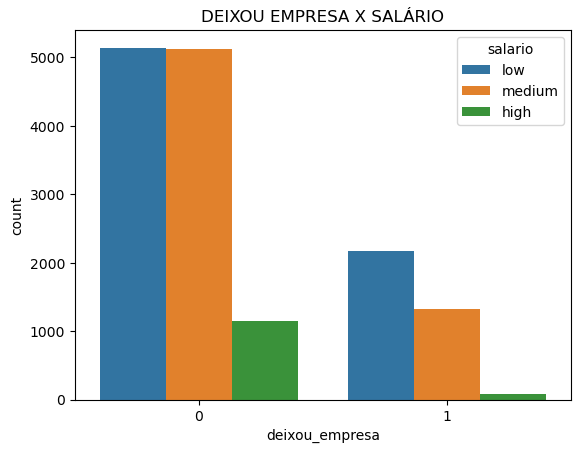

In [16]:
sns.countplot(hue='salario', x='deixou_empresa',data=df)
plt.title('DEIXOU EMPRESA X SALÁRIO')
plt.show()

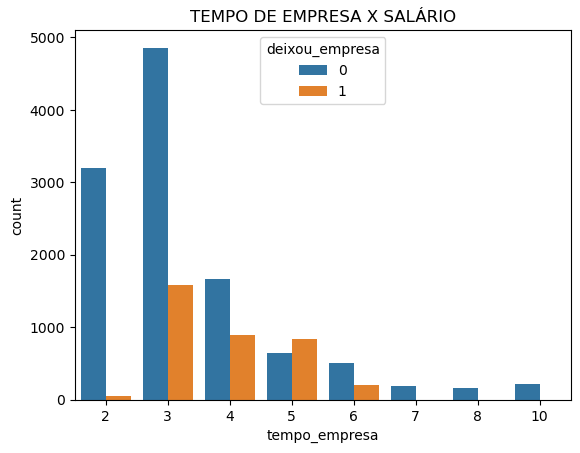

In [17]:
sns.countplot(hue='deixou_empresa', x='tempo_empresa',data=df)
plt.title('TEMPO DE EMPRESA X SALÁRIO')
plt.show()

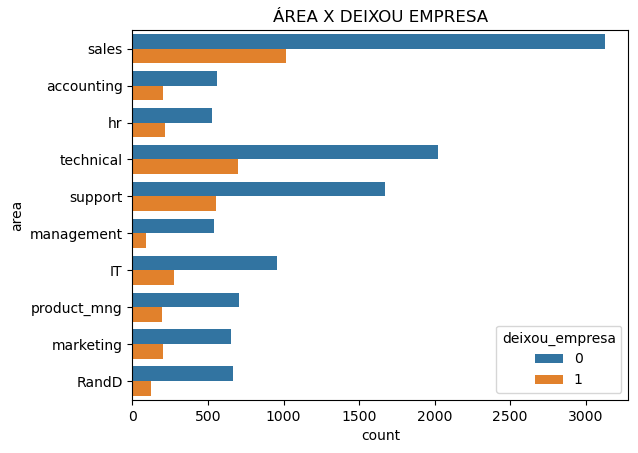

In [18]:
sns.countplot(hue='deixou_empresa', y='area',data=df)
plt.title('ÁREA X DEIXOU EMPRESA')
plt.show()

# 4. PRÉ-PROCESSAMENTO

In [19]:
hora_trab = StandardScaler()
df['horas_medias_por_mes'] = hora_trab.fit_transform(df[['horas_medias_por_mes']].values)

In [20]:
label_encd = LabelEncoder()
df['area'] = label_encd.fit_transform(df[['area']].values)
df['salario'] = label_encd.fit_transform(df[['salario']].values)

C:\Users\vinic\.continuum\conda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [21]:
df.head(1)

,nivel_satisfacao,ultima_avaliacao,numero_projetos,horas_medias_por_mes,tempo_empresa,acidente_trabalho,deixou_empresa,ultima_promocao_5anos,area,salario
0,0.38,0.53,2,-0.88204,3,0,1,0,7,1


# 5. CRIAÇÃO DOS MODELOS

## 5.1. SEPARAÇÃO DOS DADOS

In [22]:
y = df['deixou_empresa']
X = df.drop(columns=['deixou_empresa'])

## 5.2. DIVIDINDO A BASE DE DADOS ENTRE TREINO E TESTE

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## 5.3. MODELO

Aqui será utilizado todos os atributos e com os dados desbalanceados.

#### RANDOM FOREST

In [24]:
clf = RandomForestClassifier(n_estimators = 30,criterion='entropy', random_state=0)
clf.fit(X_train, y_train)
predict = clf.predict(X_test)

In [25]:
accuracy_score(y_test, predict)

0.9904

In [26]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2838
           1       0.99      0.97      0.98       912

    accuracy                           0.99      3750
   macro avg       0.99      0.98      0.99      3750
weighted avg       0.99      0.99      0.99      3750



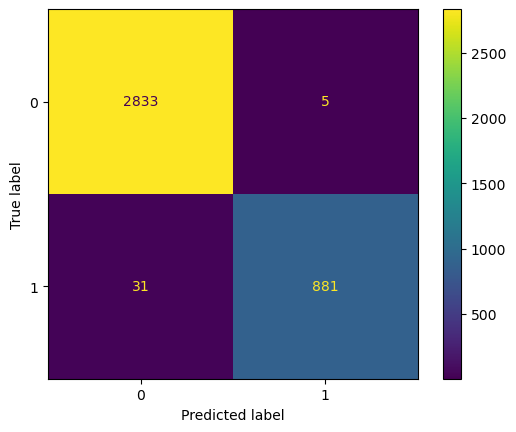

In [27]:
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

Com o randomForest, é possível determinar a importancia de cada feature (atributo).

#### ENTENDENDO O NÍVEL DE IMPORTÂNCIA PARA CADA ATRIBUTO.

In [28]:
print(clf.feature_importances_)

[0.32582285 0.12631987 0.15502913 0.14705156 0.20708894 0.00645756
 0.00154053 0.01956125 0.01112831]


In [29]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X.columns,
                                   columns=['Importância']).sort_values('Importância', ascending=False)
feature_importances

,Importância
nivel_satisfacao,0.325823
tempo_empresa,0.207089
numero_projetos,0.155029
horas_medias_por_mes,0.147052
ultima_avaliacao,0.126320
area,0.019561
salario,0.011128
acidente_trabalho,0.006458
ultima_promocao_5anos,0.001541


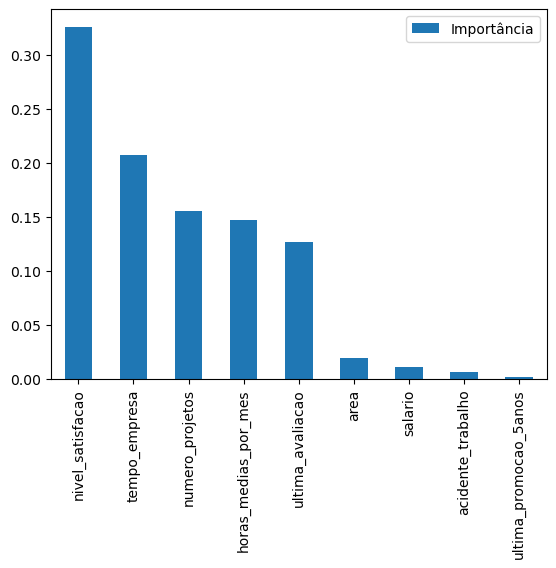

In [30]:
feature_importances.plot(kind='bar')
plt.show()

Outra forma de determinar bons features, é utilizando o RFE.

In [31]:
rfe = RFE(clf, n_features_to_select=5)
fit = rfe.fit(X, y)

print ("Número de features: {}".format(fit.n_features_))  

Número de features: 5


In [32]:
cols = fit.get_support(indices=True)
df.iloc[:,cols]

,nivel_satisfacao,ultima_avaliacao,numero_projetos,horas_medias_por_mes,tempo_empresa
0,0.38,0.53,2,-0.882040,3
1,0.80,0.86,5,1.220423,6
2,0.11,0.88,7,1.420657,4
3,0.72,0.87,5,0.439508,5
4,0.37,0.52,2,-0.841993,3
...,...,...,...,...,...
14994,0.40,0.57,2,-1.002181,3
14995,0.37,0.48,2,-0.821970,3
14996,0.37,0.53,2,-1.162368,3
14997,0.11,0.96,6,1.580845,4


# 6. OTIMIZANDO O MODELO

In [33]:
params = {
    'n_estimators': [50, 100],
    'criterion'   : ['entropy', 'gini'],
    'max_depth'   : [3, 5, 9],    
}
grid_search = GridSearchCV(estimator= RandomForestClassifier(), param_grid = params, cv=5)
grid_search.fit(X, y)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params)
print(best_score)

{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 50}
0.9800651772813159


In [34]:
result = []
for i in range(15):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    clf = RandomForestClassifier(n_estimators = 50,criterion='gini', max_depth=9)
    scores = cross_val_score(clf, X, y, cv=kfold)
    result.append(scores.mean())

In [35]:
result = pd.DataFrame(data=result, columns=['Resultado'])

In [36]:
result.describe()

,Resultado
count,15.000000
mean,0.980808
std,0.000225
min,0.980466
25%,0.980666
50%,0.980798
75%,0.980966
max,0.981199
